## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import calendar

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Data

In [2]:
df = pd.read_excel(r'data/customer.xlsx')

## 3. EDA

### 3a. Description

In [3]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [4]:
df.sample(5).T

228155                          76162   \
InvoiceNo                        556917                          542621   
StockCode                         21993                           21232   
Description  FLORAL FOLK STATIONERY SET  STRAWBERRY CERAMIC TRINKET BOX   
Quantity                             60                              12   
InvoiceDate         2011-06-15 13:37:00             2011-01-31 09:05:00   
UnitPrice                          1.25                            1.25   
CustomerID                      12415.0                         12528.0   
Country                       Australia                         Germany   

                                   465576                            5518    \
InvoiceNo                          576246                            536864   
StockCode                           22364                             21870   
Description  GLASS JAR DIGESTIVE BISCUITS  I CAN ONLY PLEASE ONE PERSON MUG   
Quantity                                1                                 1   
InvoiceDate           2011-11-14 13:42:00               2010-12-03 11:27:00   
UnitPrice                            2.95                              3.36   
CustomerID                        17566.0                               NaN   
Country                    United Kingdom                    United Kingdom   

                                   324420  
InvoiceNo                          565398  
StockCode                           22998  
Description  TRAVEL CARD WALLET KEEP CALM  
Quantity                               48  
InvoiceDate           2011-09-02 16:50:00  
UnitPrice                            0.42  
CustomerID                        15856.0  
Country                    United Kingdom

In [5]:
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

In [6]:
df.shape

(541909, 8)

### 4a. Null Values

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 4b. Unique Values

In [8]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## 5. Preprocessing

In [9]:
df.isnull().sum()/df.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

### 5a. Duplicate values

In [10]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

### 5b. Null values in Customer ID

- Check for null values for customer ID
- For visualization purposes fill null values with "unknown"/"unregistered" customers

In [11]:
null_inv = df[df['CustomerID'].isna()].InvoiceNo.unique().tolist()

In [12]:
df['CustomerID'].fillna("unknown", inplace=True)

In [13]:
df.query('~CustomerID.isna()')['CustomerID'] = df.query('~CustomerID.isna()')['CustomerID'].apply(lambda x: str(x)[:-2]).tolist()

In [14]:
df['Description'].fillna('no description', inplace=True)

In [15]:
df['InvoiceNo'].apply(lambda x: str(x)[0]).value_counts()

InvoiceNo
5    532618
C      9288
A         3
Name: count, dtype: int64

## 6. Visualisations

In [16]:
df['month'] = df['InvoiceDate'].dt.month

In [17]:
df['Revenue'] = df['UnitPrice']*df['Quantity']

In [18]:
df['Status'] = ["Cancelled" if len(str(i))>6 else "Completed" for i in df['InvoiceNo']]

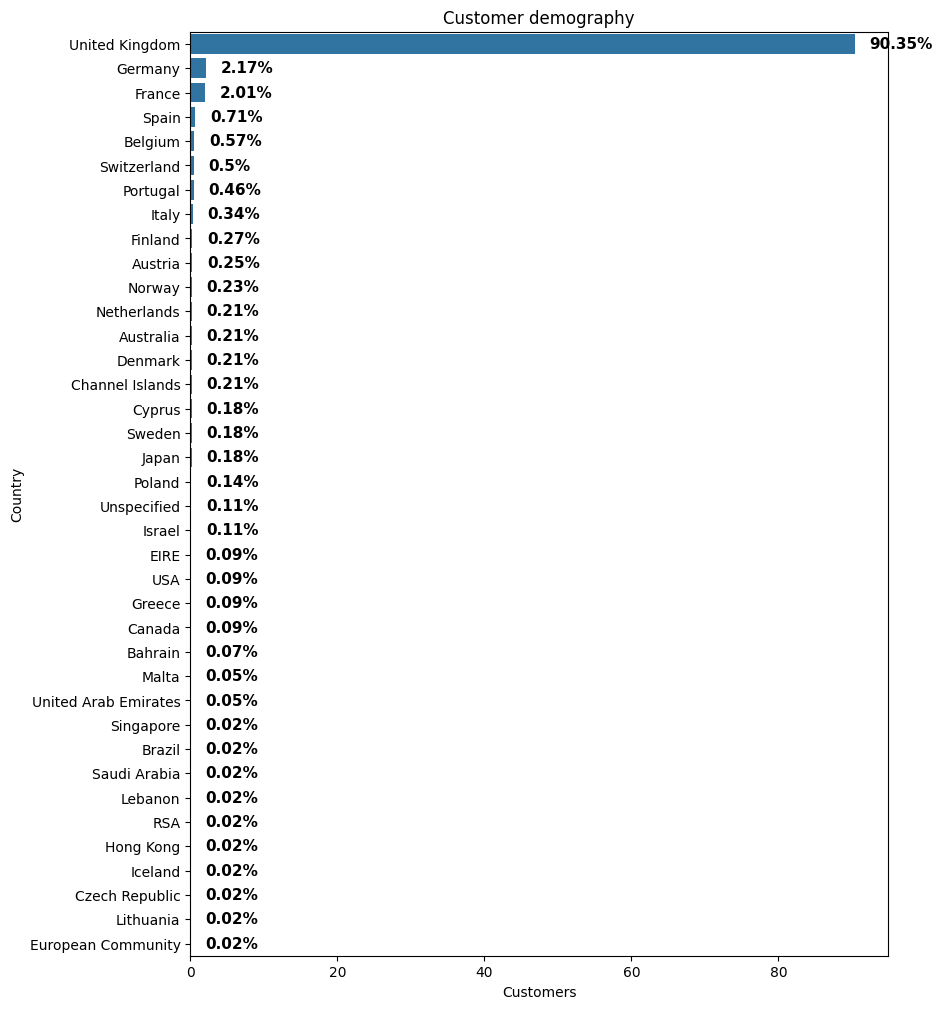

In [19]:
data1 = (df.groupby('Country')['CustomerID'].nunique()*100/df['CustomerID'].nunique()).sort_values(ascending=False).reset_index()
data1.columns = ['Country', 'Customer_count']

plt.figure(figsize=[9,12])
ax = sns.barplot(
    data=data1, 
    y='Country', 
    x='Customer_count'
)
x_offset = 2
# Annotation
for i, t in enumerate(data1.Customer_count):
    plt.text(x = t + x_offset, y = i, s = str(round(t, 2))+"%", va='center', fontsize=11, weight='bold')

plt.title('Customer demography')
plt.xlabel('Customers')
plt.show()

### 6a. Monthly Revenue

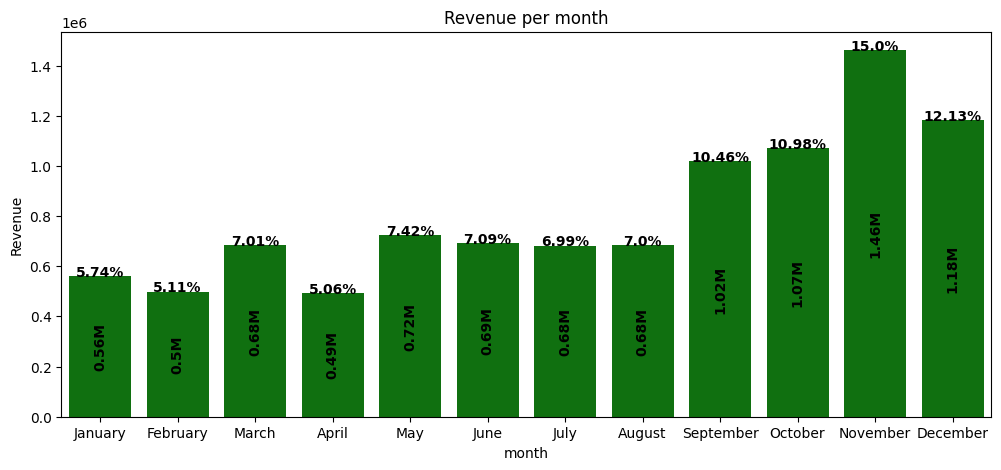

In [51]:
total = df.Revenue.sum()

month_rev = df.groupby('month').apply(lambda s: pd.Series({
    'Revenue' : s['Revenue'].sum(),
    'Revenue%' : s['Revenue'].sum()*100/total
})).reset_index()

month_rev.columns = ['month', 'Revenue', 'Revenue%']
month_rev['month'] = month_rev['month'].apply(lambda x: calendar.month_name[x])

# Plot
plt.figure(figsize=[12,5])

ax1 = sns.barplot(
    data=month_rev, 
    x='month', y='Revenue',
    color='green'
)

# Annotation
for i, (t, u) in enumerate(zip(month_rev.Revenue, month_rev['Revenue%'])):
    plt.text(x = i, y = t / 2, s = str(round(t / 1000000, 2))+"M", va='center', ha='center', rotation='vertical', weight='bold')
    plt.text(x = i, y = t + 100, s = str(round(u, 2))+"%", ha='center', rotation='horizontal', weight='bold')

plt.title('Revenue per month')
plt.show()

### 6b. Monthly Transactions

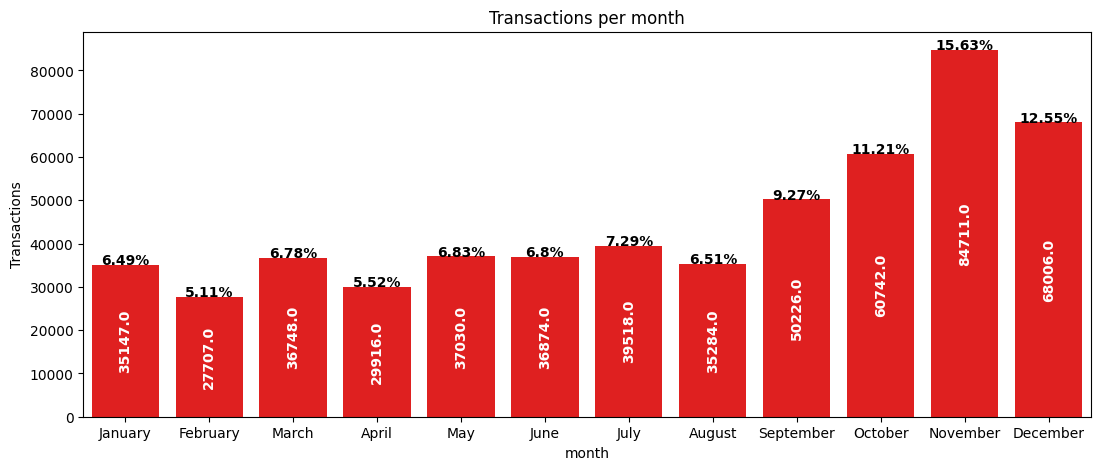

In [53]:
total_transactions = df['InvoiceNo'].count()

month_inv = df.groupby('month').apply(lambda s: pd.Series({
    'Transactions' : s['InvoiceNo'].count(),
    'Transactions%' : s['InvoiceNo'].count()*100/total_transactions
})).reset_index()
month_inv['month'] = month_inv['month'].apply(lambda x: calendar.month_name[x])

# Plot
plt.figure(figsize=[13,5])
sns.barplot(
    data=month_inv, 
    x='month', y='Transactions',
    color='red'
)

# Annotation
for i, (t, u) in enumerate(zip(month_inv.Transactions, month_inv['Transactions%'])):
    plt.text(x = i, y = t / 2, s = str(round(t, 2)), va='center', ha='center', rotation='vertical', color='white', weight='bold')
    plt.text(x = i, y = t + 100, s = str(round(u, 2))+"%", ha='center', rotation='horizontal', weight='bold')

plt.title("Transactions per month")
plt.ylabel(ylabel="Transactions")
plt.show()

### 6c. Countrywise Revenue

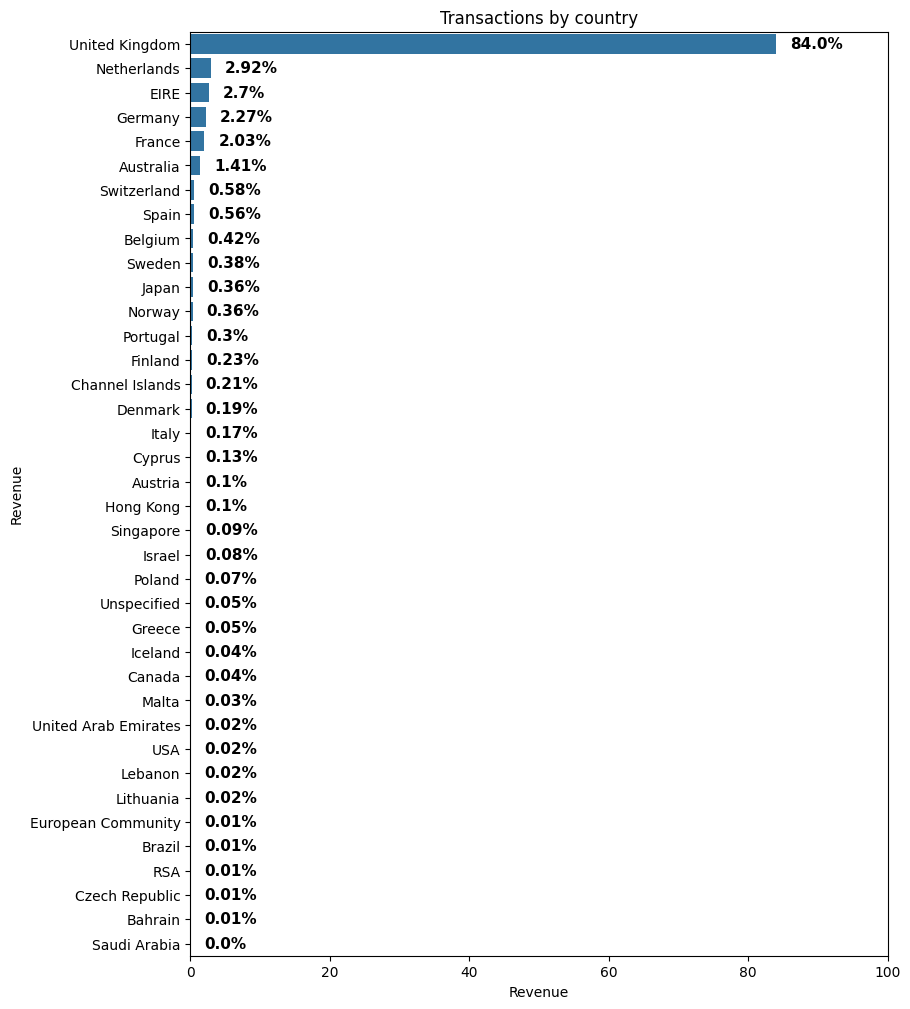

In [67]:
count_rev = (df.groupby('Country')['Revenue'].sum()*100/df['Revenue'].sum()).sort_values(ascending=False).reset_index()
count_rev.columns = ['Country', 'Revenue']

plt.figure(figsize=[9,12])
sns.barplot(
    data=count_rev, 
    y='Country', x='Revenue'
)
x_offset = 2
# Annotation
for i, t in enumerate(count_rev.Revenue):
    plt.text(x = t + x_offset, y = i, s = str(round(t, 2))+"%", va='center', fontsize=11, weight='bold')

plt.xlim(0,100)
plt.title('Transactions by country')
plt.ylabel('Revenue')
plt.show()

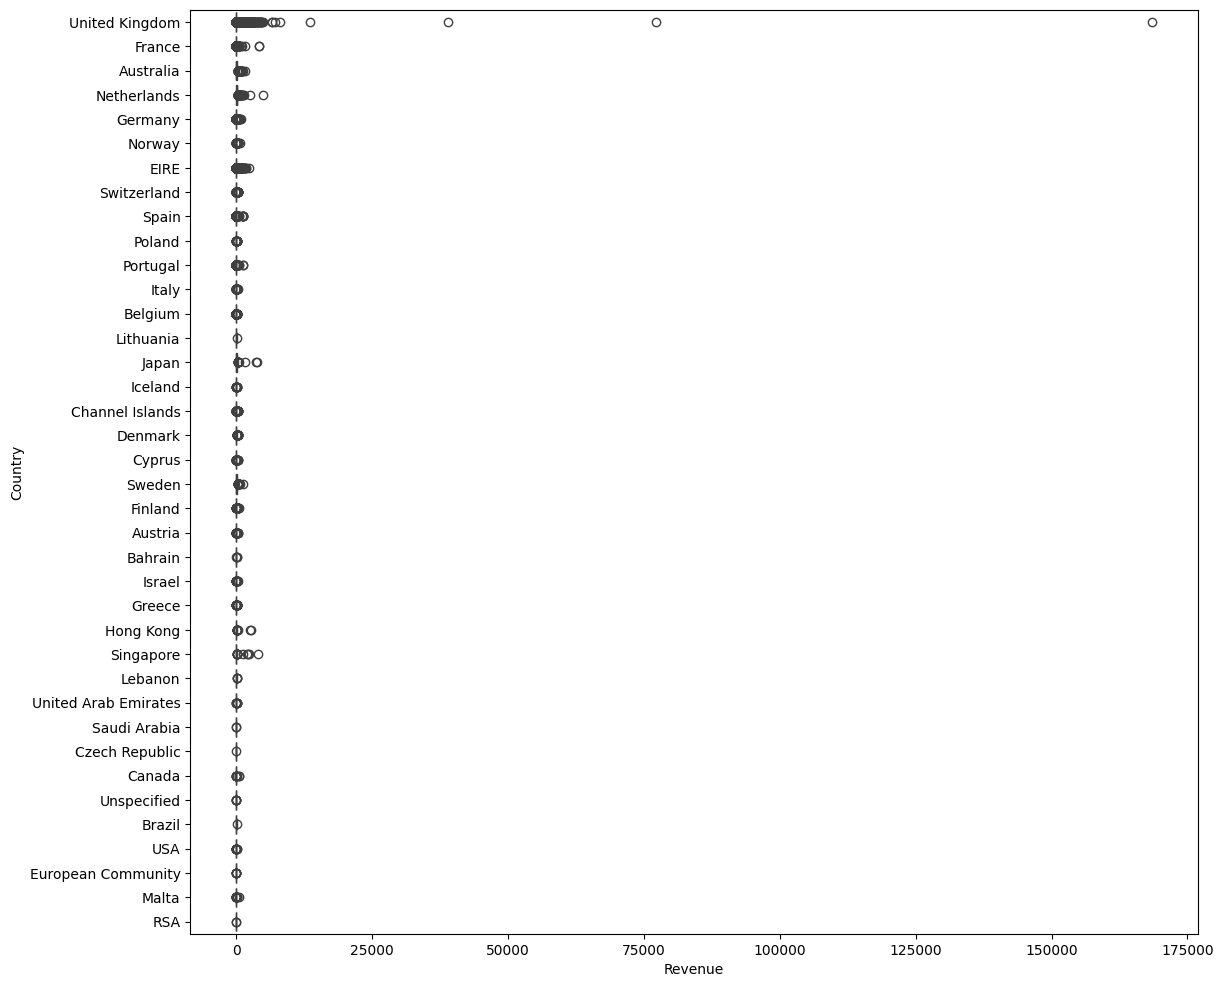

In [59]:
plt.figure(figsize=[13,12])
sns.boxplot(data=df.query('Status=="Completed"'), y='Country', x='Revenue')
plt.show()

### 6d. Countrywise Transactions

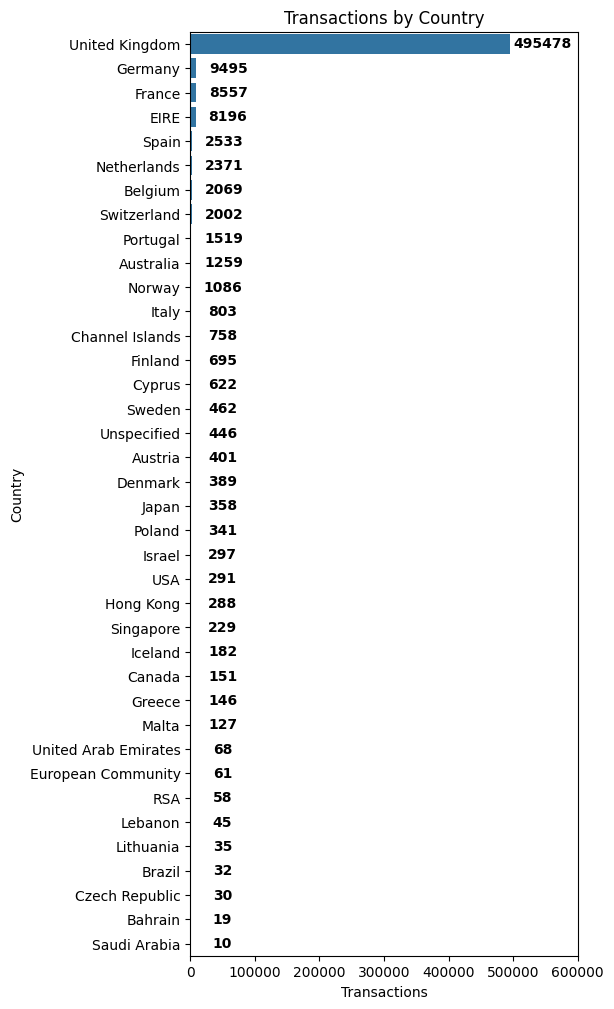

In [75]:
co_inv = (df.groupby('Country')['InvoiceNo'].count()).sort_values(ascending=False).reset_index()
co_inv.columns = ['Country', 'Transactions']

# Plot
plt.figure(figsize=[5,12])
sns.barplot(
    data=co_inv, 
    y='Country', x='Transactions'
)
x_offset = 50000

# Annotation
for i, t in enumerate(co_inv.Transactions):
    plt.text(x = t + x_offset, y = i, s = t, va = 'center', ha = 'center', color = 'black', weight = 'bold')

plt.xlim(0,600000)
plt.title('Transactions by Country')
plt.xlabel('Transactions')
plt.show()

### 6e. Countrywise customers

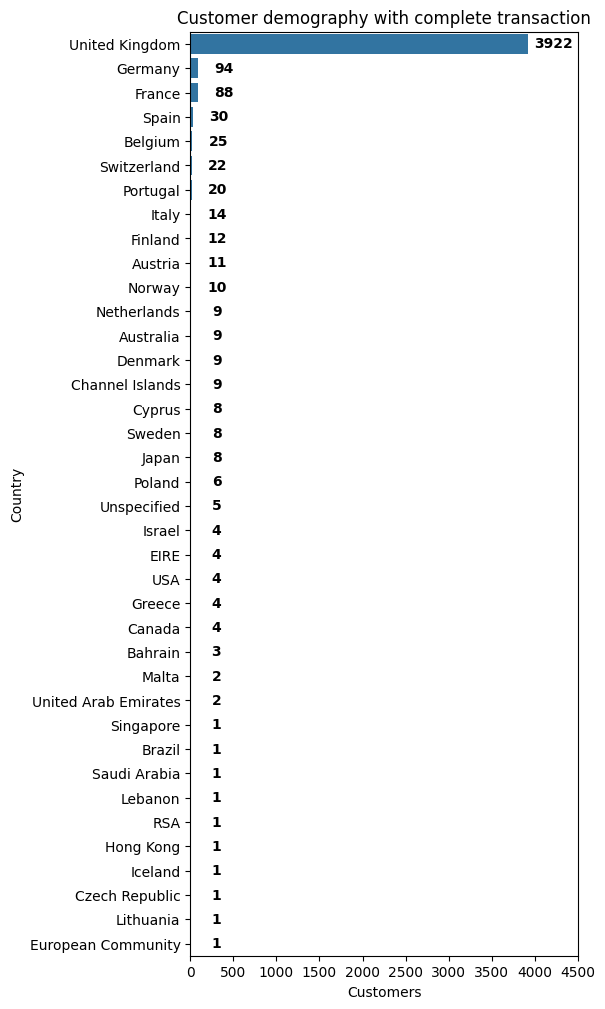

In [83]:
cust_comp = (df.query('Status=="Completed"').groupby('Country')['CustomerID'].nunique()).sort_values(ascending=False).reset_index()
cust_comp.columns = ['Country', 'Customers']

# Plot
plt.figure(figsize=[5,12])
sns.barplot(
    data=cust_comp, 
    y='Country', x='Customers'
)
x_offset = 300

# Annotation
for i, t in enumerate(cust_comp.Customers):
    plt.text(x = t + x_offset, y = i, s = t, ha = 'center', va = 'center', color = 'black', weight = 'bold')

plt.xlim(0,4500)
plt.title('Customer demography with complete transaction')
plt.xlabel('Customers')
plt.show()

### 6f. Price - Quantity Chart

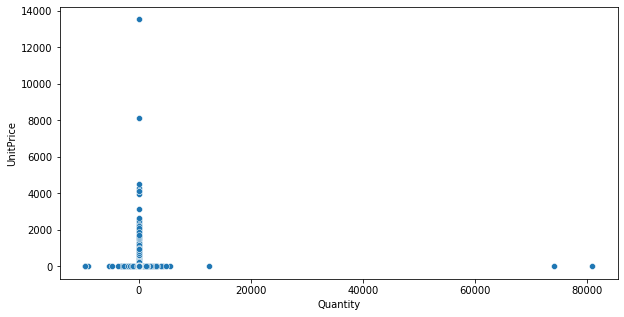

In [26]:
plt.figure(figsize=[10,5])
sns.scatterplot(data=df.query('Status=="Completed"'), y='UnitPrice', x='Quantity')
plt.show()

## 7. Analysis

### 7a. Lifetime Value (LTV)

In [27]:
ltv = df.query('CustomerID!="unknown"')

In [28]:
df_ltv = ltv.query('Status=="Completed"').groupby('CustomerID').apply(lambda s: pd.Series({
    'Revenue' : round(s['Revenue'].sum()),
    'Avg_revenue' : round(s['Revenue'].mean()),
    'Transactions' : s['InvoiceNo'].count(),
    'Retention_time' : (s['InvoiceDate'].max() - s['InvoiceDate'].min()).days
})).reset_index()

In [29]:
df_ltv['Retention_time'] = [1 if i==0 else i for i in df_ltv['Retention_time']]
df_ltv['Retention_years'] = round(df_ltv['Retention_time']/365, 3)
df_ltv['Retention_month'] = round(df_ltv['Retention_time']/30)

In [30]:
df_ltv.groupby('CustomerID').apply(lambda s: pd.Series({
    'CV': round((s['Revenue'].sum()/s['Transactions'].sum())*s['Transactions'].mean()),
    'CLTV': round((s['Revenue'].sum()/s['Transactions'].sum()*s['Transactions'].mean())*s['Retention_years'].mean())
}))

CV  CLTV
CustomerID             
12346.0     77184   232
12347.0      4310  4310
12348.0      1797  1389
12349.0      1758     5
12350.0       334     1
...           ...   ...
18280.0       181     1
18281.0        81     0
18282.0       178    57
18283.0      2095  1911
18287.0      1837   795

[4339 rows x 2 columns]

In [31]:
df_ltv.head()

CustomerID  Revenue  Avg_revenue  Transactions  Retention_time   
0     12346.0    77184        77184             1               1  \
1     12347.0     4310           24           182             365   
2     12348.0     1797           58            31             282   
3     12349.0     1758           24            73               1   
4     12350.0      334           20            17               1   

   Retention_years  Retention_month  
0            0.003              0.0  
1            1.000             12.0  
2            0.773              9.0  
3            0.003              0.0  
4            0.003              0.0

In [32]:
print("Customer Value :", round((df_ltv['Revenue'].sum()/df_ltv['Transactions'].sum())*df_ltv['Transactions'].mean()))
print('Customer Lifespan :', round(df_ltv['Retention_years'].mean(), 2), 'years or', round(df_ltv['Retention_month'].mean()), 'months')
print("CLTV :", round((df_ltv['Revenue'].sum()/df_ltv['Transactions'].sum()*df_ltv['Transactions'].mean())*df_ltv['Retention_years'].mean()))

Customer Value : 2054
Customer Lifespan : 0.36 years or 4 months
CLTV : 736


### 7b. Average Revenue Per User (ARPU)

In [33]:
print("ARPU :",round(df_ltv['Revenue'].sum()/df_ltv.shape[0]))

ARPU : 2054


### 7c. Average Purchase Value

In [34]:
print('APV :', round(df_ltv['Revenue'].sum()/df_ltv['Transactions'].sum()))

APV : 22


### 7d. Average Purchase Frequency Rate

In [35]:
print('APFR :', round(df_ltv['Transactions'].sum()/df_ltv.shape[0]))

APFR : 92


### 7e. Repeat Purchase Rate (RPR)

In [36]:
print('RPR :', round(df_ltv.query('Retention_time>1')['CustomerID'].count()/df_ltv['CustomerID'].count(), 2))

RPR : 0.64
